In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#input dataset
data=pd.read_csv('./data/preprocess_dataset/dataset_2class_1descriptor_onlypio.csv')

del data['Unnamed: 0']
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = MinMaxScaler() 
X = scaler.fit_transform(x)

In [3]:
col = data.columns[:-1]
print(col)
X=pd.DataFrame(X,columns=col)
data=pd.concat([X,y],axis=1)

Index(['MoranAuto_Hydrophobicity1', 'MoranAuto_Hydrophobicity2',
       'MoranAuto_Hydrophobicity3', 'MoranAuto_Hydrophobicity4',
       'MoranAuto_Hydrophobicity5', 'MoranAuto_Hydrophobicity6',
       'MoranAuto_Hydrophobicity7', 'MoranAuto_Hydrophobicity8',
       'MoranAuto_Hydrophobicity9', 'MoranAuto_Hydrophobicity10',
       ...
       'GearyAuto_Mutability21', 'GearyAuto_Mutability22',
       'GearyAuto_Mutability23', 'GearyAuto_Mutability24',
       'GearyAuto_Mutability25', 'GearyAuto_Mutability26',
       'GearyAuto_Mutability27', 'GearyAuto_Mutability28',
       'GearyAuto_Mutability29', 'GearyAuto_Mutability30'],
      dtype='object', length=480)


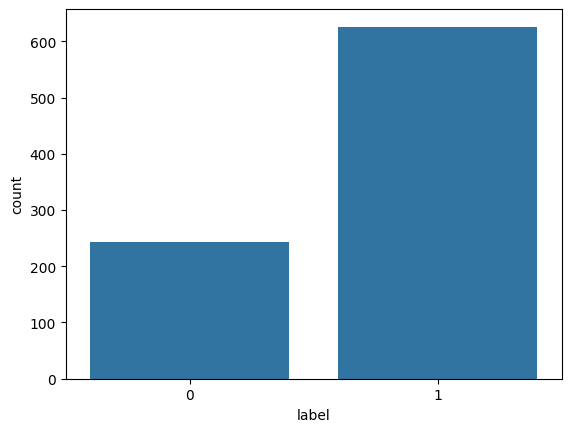

In [4]:
ax = sns.countplot(x='label',data=data)   

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1000.0, gamma=0.1, random_state=0)
clf = clf.fit(X_train,y_train)

Confusion Matrix:
[[ 56  18]
 [ 13 174]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        74
           1       0.91      0.93      0.92       187

    accuracy                           0.88       261
   macro avg       0.86      0.84      0.85       261
weighted avg       0.88      0.88      0.88       261

Accuracy: 0.8812260536398467


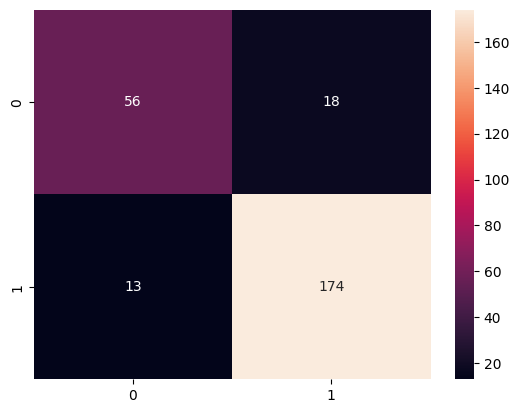

In [7]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 55  19]
 [ 11 176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.79        74
           1       0.90      0.94      0.92       187

    accuracy                           0.89       261
   macro avg       0.87      0.84      0.85       261
weighted avg       0.88      0.89      0.88       261

Accuracy: 0.8850574712643678


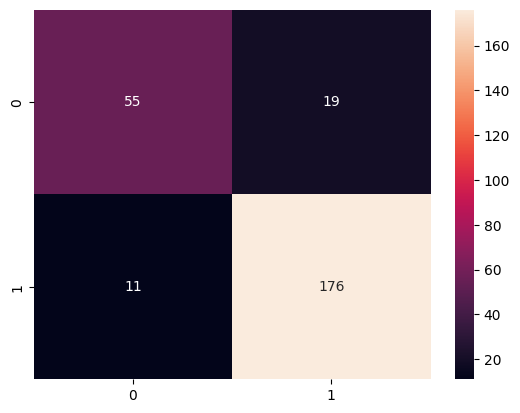

In [8]:
# RandomForest
forest = RandomForestClassifier(n_estimators = 10, random_state=0)      
forest = forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

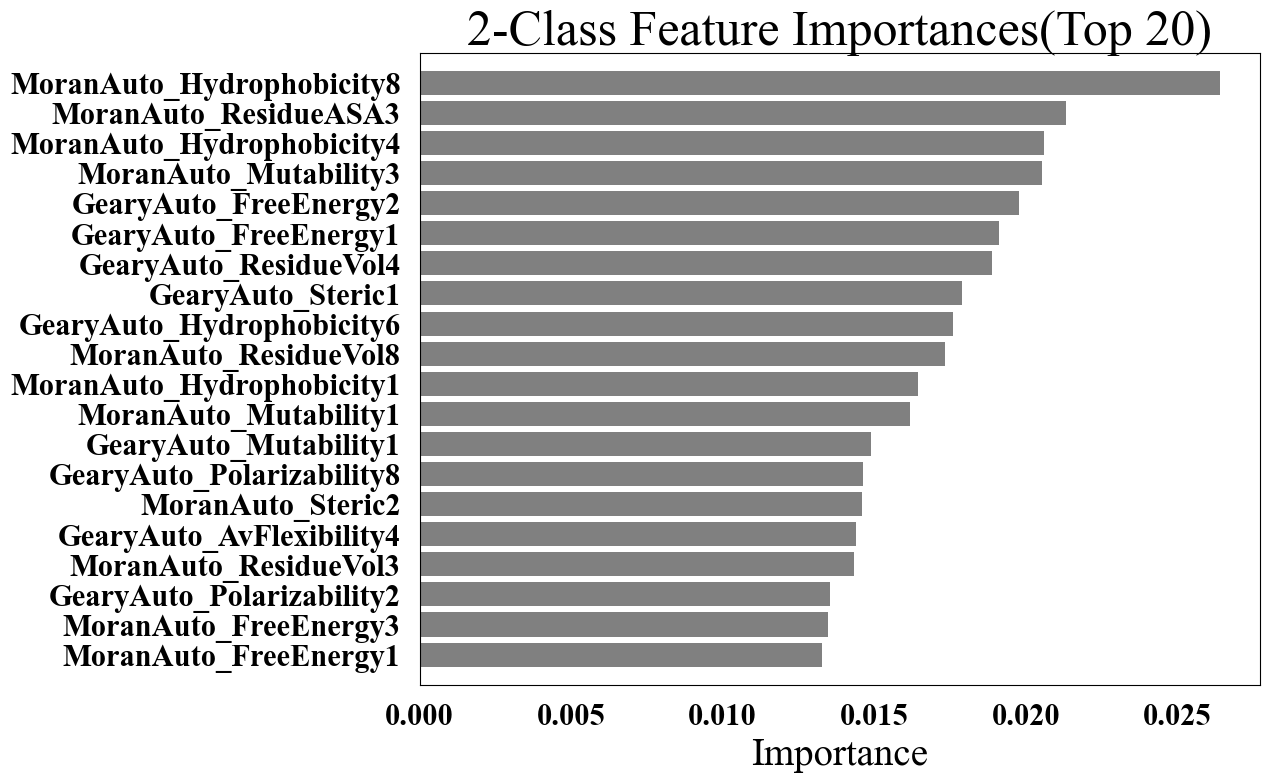

In [9]:
# feature importances
importances = forest.feature_importances_
plt.figure(figsize=(12, 8))

indices = importances.argsort()[::-1][:20]
plt.style.use('default')
plt.rcParams["font.weight"] = "bold"

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xticks(size=22)
plt.yticks(size=22)


font1 = {'size' : 36,}
font2 = {'size' : 28,}
font3 = {'size' : 13,}


plt.title("2-Class Feature Importances(Top 20)",font1)


ax = plt.gca()
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=10)


plt.barh(range(len(indices)), importances[indices],color='gray')
plt.yticks(range(len(indices)), col[indices])
plt.ylim([-1, len(indices)])
plt.gca().invert_yaxis()

plt.xlabel('Importance',font2)
plt.gcf().subplots_adjust(left=0.2,top=0.91,bottom=0.12) 

# 6.save
#plt.savefig('importance.tif', dpi=300)
plt.show()


Confusion Matrix:
[[ 48  26]
 [ 12 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72        74
           1       0.87      0.94      0.90       187

    accuracy                           0.85       261
   macro avg       0.84      0.79      0.81       261
weighted avg       0.85      0.85      0.85       261

Accuracy: 0.8544061302681992


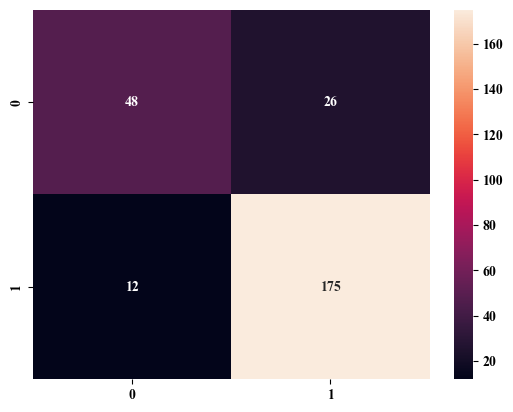

In [10]:
from xgboost import XGBClassifier

clf2 = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5, random_state=0
)
clf2 = clf2.fit(X_train,y_train)
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

MLP= MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(2000,50), random_state=0) 
MLP.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2000, 50), random_state=0,
              solver='sgd')

Confusion Matrix:
[[ 14  60]
 [ 14 173]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.19      0.27        74
           1       0.74      0.93      0.82       187

    accuracy                           0.72       261
   macro avg       0.62      0.56      0.55       261
weighted avg       0.67      0.72      0.67       261

Accuracy: 0.7164750957854407


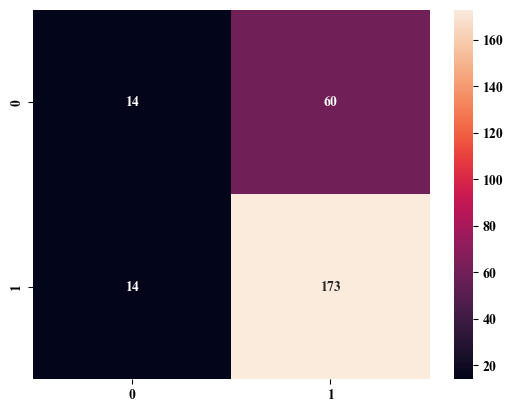

In [12]:
y_train_pred = MLP.predict(X_train)
y_test_pred = MLP.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 56  18]
 [ 18 169]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        74
           1       0.90      0.90      0.90       187

    accuracy                           0.86       261
   macro avg       0.83      0.83      0.83       261
weighted avg       0.86      0.86      0.86       261

Accuracy: 0.8620689655172413


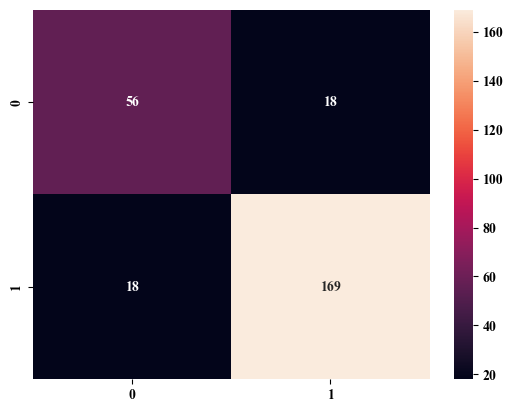

In [13]:
#GBDT
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
         max_depth=1, random_state=0).fit(X_train, y_train)
y_train_pred = clf3.predict(X_train)
y_test_pred = clf3.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [14]:
# select 20 features 
k_best = SelectKBest(chi2,k=20).fit(X_train, y_train)
#k_best

selected = k_best.get_support()
selected_features= [col[i] for i, s in enumerate(selected) if s]
scores = [k_best.scores_[i] for i, s in enumerate(selected) if s]

df = pd.DataFrame({'feature': selected_features, 'score': scores})
df = df.sort_values('score', ascending=False)

print(df)

                       feature     score
3     GearyAuto_AvFlexibility9  4.632845
11       GearyAuto_ResidueASA1  4.604758
17           GearyAuto_Steric9  4.588541
4    GearyAuto_AvFlexibility11  4.517843
12       GearyAuto_ResidueASA9  4.499944
2   GearyAuto_Hydrophobicity11  4.423879
0    GearyAuto_Hydrophobicity8  4.366528
16       GearyAuto_ResidueVol9  4.357600
13      GearyAuto_ResidueASA11  4.259225
5    GearyAuto_Polarizability9  4.203908
9       GearyAuto_FreeEnergy11  4.201866
1    GearyAuto_Hydrophobicity9  4.057386
18      GearyAuto_Mutability11  3.989410
10      GearyAuto_FreeEnergy12  3.672667
6   GearyAuto_Polarizability11  3.664907
19      GearyAuto_Mutability12  3.630035
7        GearyAuto_FreeEnergy9  3.467406
8       GearyAuto_FreeEnergy10  3.425108
14      GearyAuto_ResidueASA12  3.359309
15       GearyAuto_ResidueVol1  3.318108


Accuracy is:  0.7432950191570882
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        74
           1       0.81      0.83      0.82       187

    accuracy                           0.74       261
   macro avg       0.68      0.67      0.68       261
weighted avg       0.74      0.74      0.74       261



<Axes: >

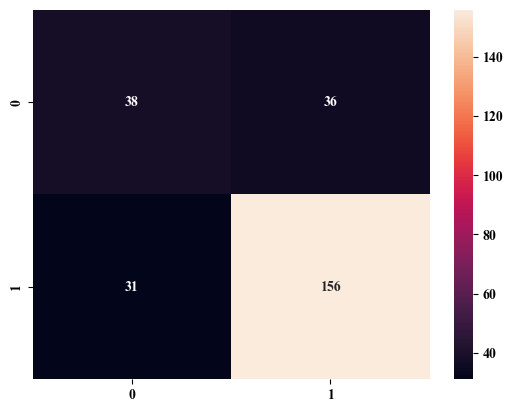

In [15]:
X_2_train=X_train[selected_features]
X_2_test=X_test[selected_features]


clf_rf_2 = RandomForestClassifier(n_estimators = 10, random_state=0)      
clr_rf_2 = clf_rf_2.fit(X_2_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_2_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_2_test))

#
result1 = classification_report(y_test, clf_rf_2.predict(X_2_test))
print("Classification Report:",)
print (result1)
sns.heatmap(cm_2,annot=True,fmt="d")

In [16]:
selected_features

['GearyAuto_Hydrophobicity8',
 'GearyAuto_Hydrophobicity9',
 'GearyAuto_Hydrophobicity11',
 'GearyAuto_AvFlexibility9',
 'GearyAuto_AvFlexibility11',
 'GearyAuto_Polarizability9',
 'GearyAuto_Polarizability11',
 'GearyAuto_FreeEnergy9',
 'GearyAuto_FreeEnergy10',
 'GearyAuto_FreeEnergy11',
 'GearyAuto_FreeEnergy12',
 'GearyAuto_ResidueASA1',
 'GearyAuto_ResidueASA9',
 'GearyAuto_ResidueASA11',
 'GearyAuto_ResidueASA12',
 'GearyAuto_ResidueVol1',
 'GearyAuto_ResidueVol9',
 'GearyAuto_Steric9',
 'GearyAuto_Mutability11',
 'GearyAuto_Mutability12']

In [17]:
#rfe randomforest
from sklearn.feature_selection import RFE

clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.94      0.98      0.96       187

    accuracy                           0.94       261
   macro avg       0.94      0.91      0.93       261
weighted avg       0.94      0.94      0.94       261

Accuracy: 0.9425287356321839


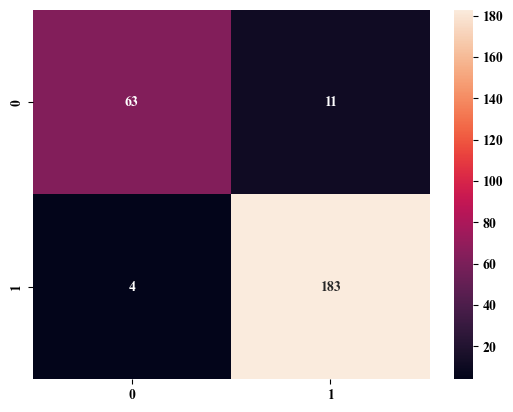

In [18]:
y_train_pred = rfe.predict(X_train)
y_test_pred = rfe.predict(X_test)

cm_2 = confusion_matrix(y_test,rfe.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

result1 = classification_report(y_test, rfe.predict(X_test))
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,rfe.predict(X_test))
print("Accuracy:",result2)

In [19]:
#rfecv for randomforest
from sklearn.feature_selection import RFECV

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5 cross valid
rfecv = rfecv.fit(X_train, y_train)


Confusion Matrix:
[[ 60  14]
 [  2 185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88        74
           1       0.93      0.99      0.96       187

    accuracy                           0.94       261
   macro avg       0.95      0.90      0.92       261
weighted avg       0.94      0.94      0.94       261

Accuracy: 0.9386973180076629


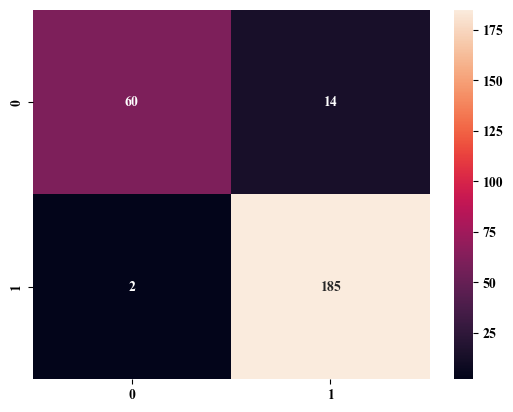

In [20]:
y_train_pred = rfecv.predict(X_train)
y_test_pred = rfecv.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [21]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', pd.DataFrame(X_train).columns[rfecv.support_])

Optimal number of features : 62
Best features : Index(['MoranAuto_Hydrophobicity1', 'MoranAuto_Hydrophobicity3',
       'MoranAuto_Hydrophobicity5', 'MoranAuto_Hydrophobicity6',
       'MoranAuto_Hydrophobicity8', 'MoranAuto_AvFlexibility1',
       'MoranAuto_AvFlexibility2', 'MoranAuto_AvFlexibility3',
       'MoranAuto_Polarizability1', 'MoranAuto_Polarizability3',
       'MoranAuto_Polarizability6', 'MoranAuto_Polarizability7',
       'MoranAuto_Polarizability8', 'MoranAuto_FreeEnergy1',
       'MoranAuto_FreeEnergy3', 'MoranAuto_FreeEnergy6',
       'MoranAuto_ResidueASA1', 'MoranAuto_ResidueASA3',
       'MoranAuto_ResidueASA4', 'MoranAuto_ResidueASA5',
       'MoranAuto_ResidueASA6', 'MoranAuto_ResidueVol3',
       'MoranAuto_ResidueVol4', 'MoranAuto_ResidueVol5',
       'MoranAuto_ResidueVol7', 'MoranAuto_ResidueVol8', 'MoranAuto_Steric1',
       'MoranAuto_Steric3', 'MoranAuto_Steric5', 'MoranAuto_Mutability1',
       'MoranAuto_Mutability3', 'GearyAuto_Hydrophobicity1',
      

In [22]:
rfecv.get_feature_names_out(col)

array(['MoranAuto_Hydrophobicity1', 'MoranAuto_Hydrophobicity3',
       'MoranAuto_Hydrophobicity5', 'MoranAuto_Hydrophobicity6',
       'MoranAuto_Hydrophobicity8', 'MoranAuto_AvFlexibility1',
       'MoranAuto_AvFlexibility2', 'MoranAuto_AvFlexibility3',
       'MoranAuto_Polarizability1', 'MoranAuto_Polarizability3',
       'MoranAuto_Polarizability6', 'MoranAuto_Polarizability7',
       'MoranAuto_Polarizability8', 'MoranAuto_FreeEnergy1',
       'MoranAuto_FreeEnergy3', 'MoranAuto_FreeEnergy6',
       'MoranAuto_ResidueASA1', 'MoranAuto_ResidueASA3',
       'MoranAuto_ResidueASA4', 'MoranAuto_ResidueASA5',
       'MoranAuto_ResidueASA6', 'MoranAuto_ResidueVol3',
       'MoranAuto_ResidueVol4', 'MoranAuto_ResidueVol5',
       'MoranAuto_ResidueVol7', 'MoranAuto_ResidueVol8',
       'MoranAuto_Steric1', 'MoranAuto_Steric3', 'MoranAuto_Steric5',
       'MoranAuto_Mutability1', 'MoranAuto_Mutability3',
       'GearyAuto_Hydrophobicity1', 'GearyAuto_Hydrophobicity5',
       'GearyAuto_

In [23]:
X_train_featureselect = X_train[col[rfecv.support_]]
X_test_featureselect = X_test[col[rfecv.support_]]

In [24]:
rfecv.cv_results_['mean_test_score']

array([0.74666034, 0.80250644, 0.83712234, 0.85691641, 0.85531771,
       0.84542745, 0.84708034, 0.86684731, 0.85533126, 0.85363772,
       0.85039967, 0.8585693 , 0.85194418, 0.86843246, 0.85188999,
       0.84862485, 0.85688931, 0.87168405, 0.87337759, 0.87343178,
       0.87340469, 0.87997561, 0.87505758, 0.8848801 , 0.8717518 ,
       0.87176534, 0.8585422 , 0.86350088, 0.86348733, 0.86682021,
       0.86520797, 0.87007181, 0.86020864, 0.8717247 , 0.86679312,
       0.86184799, 0.86509958, 0.86022219, 0.87339114, 0.85691641,
       0.8717518 , 0.870126  , 0.86840537, 0.87008535, 0.86351443,
       0.86844601, 0.87339114, 0.87992142, 0.87008535, 0.87660209,
       0.86511313, 0.86841891, 0.87171115, 0.87005826, 0.86843246,
       0.87008535, 0.87339114, 0.85852865, 0.86843246, 0.86020864,
       0.87176534, 0.88815879, 0.87333695, 0.87336404, 0.85855575,
       0.87665628, 0.86840537, 0.86679312, 0.86183444, 0.86845956,
       0.86516732, 0.86350088, 0.86348733, 0.87337759, 0.87336

In [25]:
np.savetxt('rfecv_2class.txt',rfecv.cv_results_['mean_test_score'],fmt='%f',delimiter=',')

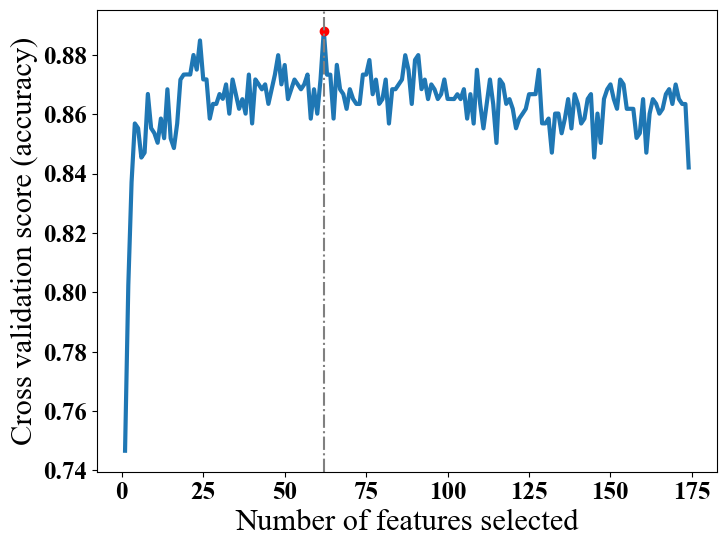

In [28]:
fig = plt.figure(figsize=(8, 6))
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
line_width = 3 
font2 = {'family' : 'Times New Roman','weight' : 'normal','size' : 22,}
font3 = {'family' : 'Times New Roman','weight' : 'normal','size' : 13,}
plt.xlabel("Number of features selected",font2)
plt.ylabel("Cross validation score (accuracy)",font2)
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) -305), rfecv.cv_results_['mean_test_score'][:174], lw=line_width)

# max
x_max=62#This parameter needs to be changed based on the selection results
y_max=rfecv.cv_results_['mean_test_score'][61]
plt.plot(x_max,y_max, 'ro')
# save
plt.axvline(x=x_max, linestyle='-.', color='grey')
plt.savefig('rfecv.tif', dpi=300)
plt.show()

In [29]:
#ROC
from sklearn.metrics import roc_curve, auc

# forest ROC
y_score1 = forest.predict_proba(X_test)[:, 1] 
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score1)
auc1 = auc(fpr1, tpr1)  # AUC
# GBDT ROC
y_score2 = clf3.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)
auc2 = auc(fpr2, tpr2) 
# rfecv ROC
y_score3 = rfecv.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3)
auc3 = auc(fpr3, tpr3) 
# rfe ROC
y_score4 = rfe.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_score4)
auc4 = auc(fpr4, tpr4)  
# XBoost ROC
y_score5 = clf2.predict_proba(X_test)[:, 1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_score5)
auc5 = auc(fpr5, tpr5) 
# MLP ROC
y_score6 = MLP.predict_proba(X_test)[:, 1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_score6)
auc6 = auc(fpr6, tpr6) 

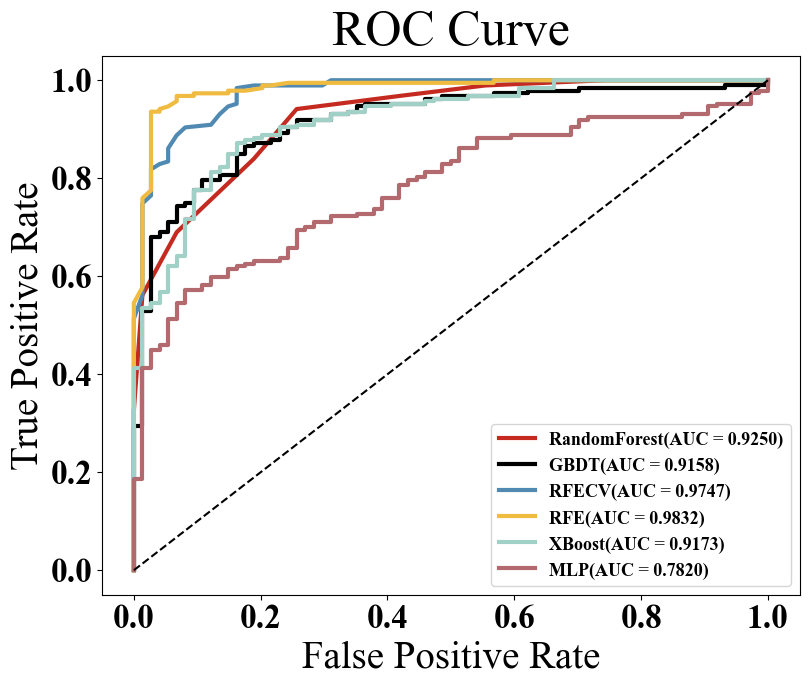

In [31]:
import matplotlib.pyplot as plt


import numpy as np
fig = plt.figure(figsize=(9, 7))
line_width = 3
plt.style.use('default') 

plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xticks(size=24)
plt.yticks(size=24)

font1 = {'size' : 36,}
font2 = {'size' : 28,}
font3 = {'size' : 13,}
plt.title('ROC Curve',font1)
plt.plot(fpr1, tpr1, lw=line_width, label='RandomForest(AUC = %0.4f)' % auc1, color='#C52A20')
plt.plot(fpr2, tpr2, lw=line_width, label='GBDT(AUC = %0.4f)' % auc2, color='#000000')
plt.plot(fpr3, tpr3, lw=line_width, label='RFECV(AUC = %0.4f)' % auc3, color='#508AB2')
plt.plot(fpr4, tpr4, lw=line_width, label='RFE(AUC = %0.4f)' % auc4, color='#F0BB41')
plt.plot(fpr5, tpr5, lw=line_width, label='XBoost(AUC = %0.4f)' % auc5, color='#A1D0C7')
plt.plot(fpr6, tpr6, lw=line_width, label='MLP(AUC = %0.4f)' % auc6, color='#B36A6F')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right', prop=font3)
plt.xlabel('False Positive Rate',font2)
plt.ylabel('True Positive Rate',font2)
#save
plt.savefig('AUC_change.tif', dpi=300)
plt.show()

In [32]:
#AUPR
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

y_score1 = forest.predict_proba(X_test)[:, 1] 
fpr1, tpr1, thresholds1 = precision_recall_curve(y_test, y_score1)
auc1 = average_precision_score(y_test, y_score1) 

y_score2 = clf3.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = precision_recall_curve(y_test, y_score2)
auc2 = average_precision_score(y_test, y_score2) 


y_score3 = rfecv.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds3 = precision_recall_curve(y_test, y_score3)
auc3 = average_precision_score(y_test, y_score3)
y_score4 = rfe.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds4 = precision_recall_curve(y_test, y_score4)
auc4 = average_precision_score(y_test, y_score4)

y_score5 = clf2.predict_proba(X_test)[:, 1]
fpr5, tpr5, thresholds5 = precision_recall_curve(y_test, y_score5)
auc5 = average_precision_score(y_test, y_score5)

y_score6 = MLP.predict_proba(X_test)[:, 1]
fpr6, tpr6, thresholds6 = precision_recall_curve(y_test, y_score6)
auc6 = average_precision_score(y_test, y_score6)

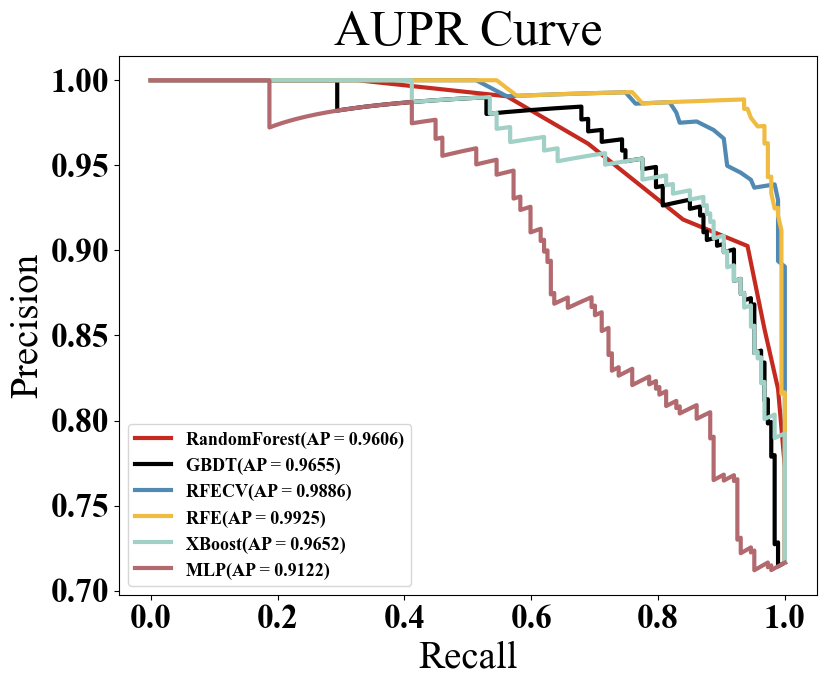

In [34]:
import matplotlib.pyplot as plt


import numpy as np
fig = plt.figure(figsize=(9, 7))
line_width = 3 
plt.style.use('default') 
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xticks(size=24)
plt.yticks(size=24)

font1 = {'size' : 36,}
font2 = {'size' : 28,}
font3 = {'size' : 13,}
plt.title('AUPR Curve',font1)
plt.plot(tpr1, fpr1, lw=line_width, label='RandomForest(AP = %0.4f)' % auc1, color='#C52A20')
plt.plot(tpr2, fpr2, lw=line_width, label='GBDT(AP = %0.4f)' % auc2, color='#000000')
plt.plot(tpr3, fpr3, lw=line_width, label='RFECV(AP = %0.4f)' % auc3, color='#508AB2')
plt.plot(tpr4, fpr4, lw=line_width, label='RFE(AP = %0.4f)' % auc4, color='#F0BB41')
plt.plot(tpr5, fpr5, lw=line_width, label='XBoost(AP = %0.4f)' % auc5, color='#A1D0C7')
plt.plot(tpr6, fpr6, lw=line_width, label='MLP(AP = %0.4f)' % auc6, color='#B36A6F')

plt.legend(loc='lower left', prop=font3)
plt.xlabel('Recall',font2)
plt.ylabel('Precision',font2)
#save
plt.savefig('AUPR_change.tif', dpi=300)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
forest.fit(X_train, y_train)

gbdt_pred = clf3.predict(X_test)
xgb_pred = clf2.predict(X_test)
rf_pred = forest.predict(X_test)

ensemble_matrix = np.column_stack((gbdt_pred, xgb_pred, rf_pred))

lr_model = LogisticRegression()
lr_model.fit(ensemble_matrix, y_test)  


final_pred = lr_model.predict(ensemble_matrix)


accuracy = accuracy_score(y_test, final_pred)
print(f'Accuracy: {accuracy}')